In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from zipfile import ZipFile
import csv


In [19]:
#df= pd.read_csv('AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_2020\CO_2020.csv', skiprows=7)
#df

file_holder = open('AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1989\CO_1989.csv') #Read file as IO text wrapper
csv_reader = csv.reader(file_holder) 
header = [] #Empty array to hold column names later
header = next(csv_reader) # Load the first row


In [24]:

header = next(csv_reader) 
header

['Pollutant',
 'NAPSID',
 'City',
 'P/T',
 'Latitude',
 'Longitude',
 'Date',
 'H01',
 'H02',
 'H03',
 'H04',
 'H05',
 'H06',
 'H07',
 'H08',
 'H09',
 'H10',
 'H11',
 'H12',
 'H13',
 'H14',
 'H15',
 'H16',
 'H17',
 'H18',
 'H19',
 'H20',
 'H21',
 'H22',
 'H23',
 'H24']

['1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [4]:
modern_header_variant1 = ['Pollutant // Polluant', 'NAPS ID // Identifiant SNPA', 'City // Ville', 'P/T // P/T',
                        'Latitude // Latitude', 'Longitude // Longitude', 'Date // Date',
                        'H01 // H01', 'H02 // H02', 'H03 // H03', 'H04 // H04', 'H05 // H05', 'H06 // H06', 'H07 // H07', 'H08 // H08',
                        'H09 // H09', 'H10 // H10', 'H11 // H11', 'H12 // H12', 'H13 // H13', 'H14 // H14', 'H15 // H15', 'H16 // H16',
                        'H17 // H17', 'H18 // H18', 'H19 // H19', 'H20 // H20', 'H21 // H21', 'H22 // H22', 'H23 // H23', 'H24 // H24']

modern_header_variant2 = ['Pollutant//Polluant', 'NAPS ID//Identifiant SNPA', 'City//Ville', 'Province/Territory//Province/Territoire',
                        'Latitude//Latitude', 'Longitude//Longitude', 'Date//Date',
                        'H01//H01', 'H02//H02', 'H03//H03', 'H04//H04', 'H05//H05', 'H06//H06', 'H07//H07', 'H08//H08', 'H09//H09', 'H10//H10', 'H11//H11',
                        'H12//H12', 'H13//H13', 'H14//H14', 'H15//H15', 'H16//H16', 'H17//H17', 'H18//H18', 'H19//H19', 'H20//H20', 'H21//H21', 'H22//H22',
                        'H23//H23', 'H24//H24']

old_school_header = ['Pollutant', 'NAPSID', 'City', 'P/T', 'Latitude', 'Longitude', 'Date',
                    'H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13',
                    'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']

pm25_old_header = ['Pollutant', 'Method', 'NAPSID', 'City', 'P/T', 'Latitude', 'Longitude', 'Date', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24'
                    ]

pm25_new_header = ['Pollutant//Polluant', 'Method Code//Code Méthode', 'NAPS ID//Identifiant SNPA', 'City//Ville',
                   'Province/Territory//Province/Territoire', 'Latitude//Latitude', 'Longitude//Longitude', 'Date//Date',
                   'H01//H01', 'H02//H02', 'H03//H03', 'H04//H04', 'H05//H05', 'H06//H06', 'H07//H07', 'H08//H08',
                   'H09//H09', 'H10//H10', 'H11//H11', 'H12//H12', 'H13//H13', 'H14//H14', 'H15//H15', 'H16//H16',
                   'H17//H17', 'H18//H18', 'H19//H19', 'H20//H20', 'H21//H21', 'H22//H22', 'H23//H23', 'H24//H24'
                    ]


pm25_other_header = ['Pollutant//Polluant', 'Method Code//Code MÃ©thode', 'NAPS ID//Identifiant SNPA', 'City//Ville',
                   'Province/Territory//Province/Territoire', 'Latitude//Latitude', 'Longitude//Longitude', 'Date//Date',
                   'H01//H01', 'H02//H02', 'H03//H03', 'H04//H04', 'H05//H05', 'H06//H06', 'H07//H07', 'H08//H08',
                   'H09//H09', 'H10//H10', 'H11//H11', 'H12//H12', 'H13//H13', 'H14//H14', 'H15//H15', 'H16//H16',
                   'H17//H17', 'H18//H18', 'H19//H19', 'H20//H20', 'H21//H21', 'H22//H22', 'H23//H23', 'H24//H24'
                    ]



pm25_new_header2 = ['Pollutant//Polluant', 'Method Code//Code M�thode', 'NAPS ID//Identifiant SNPA', 'City//Ville',
                   'Province/Territory//Province/Territoire', 'Latitude//Latitude', 'Longitude//Longitude', 'Date//Date',
                   'H01//H01', 'H02//H02', 'H03//H03', 'H04//H04', 'H05//H05', 'H06//H06', 'H07//H07', 'H08//H08',
                   'H09//H09', 'H10//H10', 'H11//H11', 'H12//H12', 'H13//H13', 'H14//H14', 'H15//H15', 'H16//H16',
                   'H17//H17', 'H18//H18', 'H19//H19', 'H20//H20', 'H21//H21', 'H22//H22', 'H23//H23', 'H24//H24'
                    ]




chemical_names_header = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'SO2']

year_list = []
for i in range(1979,2022):
    year_list.append(str(i))


for i in range(len(pm25_old_header)):
            pm25_old_header[i] = pm25_old_header[i].replace(" ", "")
            
for i in range(len(pm25_new_header)):
            pm25_new_header[i] = pm25_new_header[i].replace(" ", "")

for i in range(len(pm25_other_header)):
            pm25_other_header[i] = pm25_other_header[i].replace(" ", "")


for i in range(len(pm25_new_header2)):
            pm25_new_header2[i] = pm25_new_header2[i].replace(" ", "")


for i in range(len(modern_header_variant1)):
            modern_header_variant1[i] = modern_header_variant1[i].replace(" ", "")
            
for i in range(len(modern_header_variant2)):
            modern_header_variant2[i] = modern_header_variant2[i].replace(" ", "")

## Extracting and Transforming Data for PM25
- Particulate Matter 2.5 $\mu m$  and smaller has its own set of headers, so it had to be processed differently 
#### (RUN BEFORE EXTRACTING AND TRANSFORMING THE OTHER DATA)


In [67]:

#Variable to keep track of the data index
fact_index = 0

# Columns for the new dataframe that is being made
total_pm25_dataframe = pd.DataFrame(columns=['Pollutant', 'Method', 'NAPSID', 'City', 'P/T', 'Latitude', 'Longitude', 'Date',
                    'H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 
                    'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24'
                    ])

# Loop through the years
for year_holder in year_list:
    try:
        path_string = 'AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_' + year_holder + '\\' + 'PM25' +'_' + year_holder + '.csv'
        file_holder = open(path_string) #Read file as IO text wrapper
        csv_reader = csv.reader(file_holder) 
        header = [] #Empty array to hold column names later
        header = next(csv_reader) # Load the first row
        for i in range(len(header)):
                header[i] = header[i].replace(" ", "") # Removing spaces so formatting is the same (so we can compare strings)
        data_start_index = 0 #Variable to store the row line where pandas should start reading data
        
        # Keep looping through the CSV file's lines until we find the column names
        while(header != modern_header_variant1) and (header != modern_header_variant2) and (header != old_school_header) and (header != pm25_new_header) and (header != pm25_new_header2) and (header != pm25_old_header) and (header != pm25_other_header):
            data_start_index += 1
            header = next(csv_reader)
            for i in range(len(header)):
                header[i] = header[i].replace(" ", "")
        print(year_holder)    
        file_holder.close()
        
        df_holder = pd.read_csv(path_string,encoding='ISO-8859-1',skiprows=data_start_index)
        df_holder.columns = total_pm25_dataframe.columns # Set the column names to be the same so we can combine dataframes
        # print(df_holder.head())

        total_pm25_dataframe = pd.concat([total_pm25_dataframe, df_holder])
        
    except:
        print('Could not find a file in the specified path: ' + path_string)


# Need to impute values
total_pm25_dataframe = total_pm25_dataframe.replace(-999.0,np.nan)# -999 replaced with Nan to exclude it from mean() calculations
total_pm25_dataframe = total_pm25_dataframe.replace(-9999.0,np.nan)# -999 replaced with Nan to exclude it from mean() calculations

start_column = total_pm25_dataframe.columns.get_loc('H01')
end_column = total_pm25_dataframe.columns.get_loc('H24')
# for i in range(num_rows):
for j in range(start_column,end_column+1):
    total_pm25_dataframe.iloc[:,j] = total_pm25_dataframe.iloc[:,j].apply(pd.to_numeric)
    total_pm25_dataframe.iloc[:,j] = total_pm25_dataframe.iloc[:,j].replace(np.nan,total_pm25_dataframe.iloc[:,j].mean())

total_pm25_dataframe['Fact_Index'] = range(1, total_pm25_dataframe.shape[0] + 1)

fact_index = total_pm25_dataframe.shape[0] + 1
print(fact_index)
try:
    total_pm25_dataframe.to_csv( 'PM25' + '_Total_Data.csv', encoding='utf-8', index=False)
except:
     print('Failed to create csv file')
total_pm25_dataframe
#total_dataframe
#total_dataframe.to_csv('CO_Total_Data.csv', encoding='utf-8', index=False)


Could not find a file in the specified path: AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1979\PM25_1979.csv
Could not find a file in the specified path: AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1980\PM25_1980.csv
Could not find a file in the specified path: AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1981\PM25_1981.csv
Could not find a file in the specified path: AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1982\PM25_1982.csv
Could not find a file in the specified path: AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1983\PM25_1983.csv
Could not find a file in the specified path: AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1984\PM25_1984.csv
Could not find a file in the specified path: AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1985\PM25_1985.csv
Could not find a file in the specified path: AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1986\PM25_1986.csv
Could not find a file in the specified path: AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_19

### Extracting, Transforming, and Loading the Data for the other Chemicals
Chemicals:
- CO
- NO
- NO<sub>2</sub>
- NO<sub>X</sub>
- SO<sub>2</sub>
- O<sub>3</sub>
- PM10

In [30]:

for particulate_name in chemical_names_header: #Loop through the chemicals available

    #Creating the dataframe and the associated column names
    total_dataframe = pd.DataFrame(columns=['Pollutant','NAPSID','City','P/T','Latitude','Longitude','Date',
                                'H01','H02','H03','H04','H05','H06','H07','H08','H09','H10','H11','H12','H13',
                                'H14','H15','H16','H17','H18','H19','H20','H21','H22','H23','H24'])
    
    for year_holder in year_list: #Loop through the years available

        try:

            #-----------------------------------------------------
            #Loading Data
            #-----------------------------------------------------
            path_string = 'AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_' + year_holder + '\\' + particulate_name +'_' + year_holder + '.csv'
            file_holder = open(path_string) #Read file as IO text wrapper
            csv_reader = csv.reader(file_holder) 
            header = [] #Empty array to hold column names later
            header = next(csv_reader) # Load the first row
            data_start_index = 0 #Variable to store the row line where pandas should start reading data
            #Find the column names
            while(header != modern_header_variant1) and (header != modern_header_variant2) and (header != old_school_header) and (header != pm25_new_header) and (header != pm25_new_header2) and (header != pm25_old_header):
                data_start_index += 1
                header = next(csv_reader)
                for i in range(len(header)):
                    header[i] = header[i].replace(" ", "")
            file_holder.close()
            #print(header)
            df_holder = pd.read_csv(path_string,encoding='ISO-8859-1',skiprows=data_start_index)
            df_holder.columns = total_dataframe.columns
            # print(df_holder.head())

            total_dataframe = pd.concat([total_dataframe, df_holder])
        except:
            print('Could not find a file in the specified path: ' + path_string)

    #--------------------------------------------------------------------------
    # Transforming Data
    #--------------------------------------------------------------------------
    # Need to impute values
    total_dataframe = total_dataframe.replace(-999.0,np.nan)
    total_dataframe = total_dataframe.replace(-9999.0,np.nan)

    start_column = total_dataframe.columns.get_loc('H01') 
    end_column = total_dataframe.columns.get_loc('H24')
    for j in range(start_column,end_column+1):
        total_dataframe.iloc[:,j] = total_dataframe.iloc[:,j].apply(pd.to_numeric)
        total_dataframe.iloc[:,j] = total_dataframe.iloc[:,j].replace(np.nan,total_dataframe.iloc[:,j].mean())

    
    
    total_dataframe['Fact_Index'] = range(fact_index, (fact_index+total_dataframe.shape[0]))
    fact_index += total_dataframe.shape[0]

    total_dataframe.to_csv( particulate_name + '_Total_Data.csv', encoding='utf-8', index=False)

total_dataframe
#total_dataframe
#total_dataframe.to_csv('CO_Total_Data.csv', encoding='utf-8', index=False)


959902
24
Could not find a file in the specified path
1726940
24
1825192
24
Could not find a file in the specified path
1341616
24
2507846
24
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
454017
24
1591771
24


,Pollutant,NAPSID,City,P/T,Latitude,Longitude,Date,H01,H02,H03,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Fact_Index
0,SO2,10101,St Johns,NL,47.56806,-52.70222,19790101,26.000000,23.000000,23.000000,...,27.0,32.0,16.0,8.0,8.0,5.0,34.0,34.0,30.000000,10410955
1,SO2,10101,St Johns,NL,47.56806,-52.70222,19790102,2.693465,11.000000,11.000000,...,27.0,23.0,38.0,28.0,35.0,34.0,35.0,30.0,21.000000,10410956
2,SO2,10101,St Johns,NL,47.56806,-52.70222,19790103,2.693465,2.696306,0.000000,...,0.0,4.0,8.0,8.0,9.0,7.0,11.0,11.0,13.000000,10410957
3,SO2,10101,St Johns,NL,47.56806,-52.70222,19790104,8.000000,2.696306,2.637153,...,17.0,12.0,9.0,17.0,21.0,21.0,11.0,28.0,19.000000,10410958
4,SO2,10101,St Johns,NL,47.56806,-52.70222,19790105,2.693465,3.000000,8.000000,...,3.0,1.0,3.0,7.0,9.0,9.0,11.0,8.0,8.000000,10410959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,SO2,129601,Fort Smith,NT,60.00455,-111.89324,2021-12-27,0.700000,0.000000,0.700000,...,1.3,1.4,1.4,1.6,1.7,1.5,1.4,1.7,1.600000,12002721
52556,SO2,129601,Fort Smith,NT,60.00455,-111.89324,2021-12-28,1.300000,0.000000,0.900000,...,0.8,0.8,0.9,1.0,1.0,1.1,1.2,1.1,0.900000,12002722
52557,SO2,129601,Fort Smith,NT,60.00455,-111.89324,2021-12-29,0.800000,0.000000,0.800000,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.900000,12002723
52558,SO2,129601,Fort Smith,NT,60.00455,-111.89324,2021-12-30,0.900000,0.000000,0.900000,...,0.9,0.9,0.9,0.9,0.9,0.8,0.9,0.9,0.900000,12002724


In [19]:
pm25_column_names = ['Pollutant//Polluant', 'Method Code//Code Méthode', 'NAPS ID//Identifiant SNPA', 'City//Ville',
                   'Province/Territory//Province/Territoire', 'Latitude//Latitude', 'Longitude//Longitude', 'Date//Date',
                   'H01//H01', 'H02//H02', 'H03//H03', 'H04//H04', 'H05//H05', 'H06//H06', 'H07//H07', 'H08//H08',
                   'H09//H09', 'H10//H10', 'H11//H11', 'H12//H12', 'H13//H13', 'H14//H14', 'H15//H15', 'H16//H16',
                   'H17//H17', 'H18//H18', 'H19//H19', 'H20//H20', 'H21//H21', 'H22//H22', 'H23//H23', 'H24//H24'
                    ]
df= pd.read_csv('AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_2019\PM25_2019.csv',encoding='ISO-8859-1', skiprows=7, sep='\t')
df = df[pm25_column_names]
df.to_csv('AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_2019\PM25_2019_Mod.csv', encoding='utf-8', index=False)


### Visualize the Data

C:\Users\ahmad\AppData\Local\Temp\ipykernel_6052\324229020.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_holder = pd.read_csv(path_holder)


86926
33
       Pollutant  Method  NAPSID       City P/T  Latitude  Longitude  \
538547     PM2.5     760   50134  MontrÃ©al  QC  45.54271  -73.57176   

             Date   H01   H02  ...  H16  H17  H18  H19  H20  H21  H22  H23  \
538547 2009-06-02  10.0  15.0  ...  7.0  6.0  4.0  3.0  6.0  6.0  6.0  5.0   

        H24  Fact_Index  
538547  7.0      538548  

[1 rows x 33 columns]


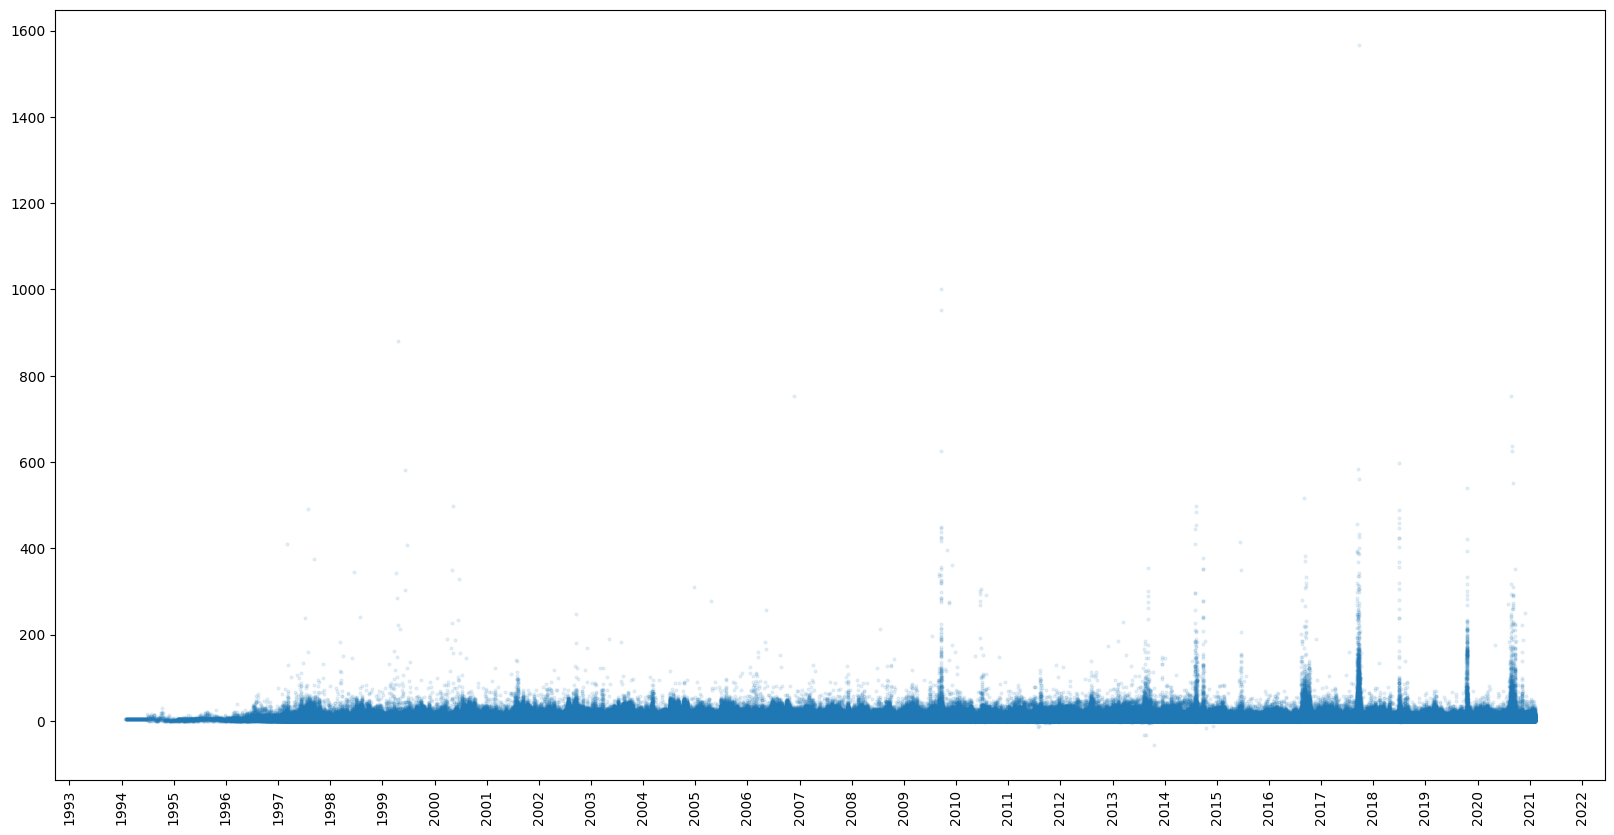

In [66]:
path_holder = 'PM25_Total_Data.csv'
df_holder = pd.read_csv(path_holder)
holder_series = df_holder['Date'].copy(deep=True)
df_holder['Date'] = pd.to_datetime(df_holder['Date'],format='%Y%m%d',errors='coerce').fillna(
    pd.to_datetime(df_holder['Date'],format='%Y/%m/%d',errors='coerce').fillna(
        pd.to_datetime(df_holder['Date'],format="%Y-%m-%d",errors='coerce').fillna(
            pd.to_datetime(df_holder['Date'],format='%m/%d/%Y',errors='coerce').fillna(
                pd.to_datetime(df_holder['Date'],format="%d-%m-%Y",errors='coerce').fillna(
                    pd.to_datetime(df_holder['Date'],format='%d%m%Y',errors='coerce')
                )
            )
        )
    )
)
# df_holder['Date'] = holder_series
# df_holder.loc[df_holder['H15'].abs() > 5000, 'H15'] = df_holder['H15'].mean()
single_station_df = df_holder[(df_holder['City'] == 'Montreal') |  (df_holder['City'] == 'MontrÃ©al')  | (df_holder['City'] == 'Montréal') | (df_holder['City'] == 'Montr�al')  ]

print(single_station_df.shape[0])
print(single_station_df.shape[1])

date_frame = df_holder.loc[(df_holder['NAPSID']== 50134) & (df_holder['Date'] == pd.to_datetime("2009-06-02")) ]
print(date_frame)

plt.figure(figsize=(20,10))
ax = plt.gca()

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()\
# ax.set_xlim( [single_station_df['Date'].min(), single_station_df['Date'].max()] )
# ax.set_ylim( [0, 300] )
plt.scatter(df_holder['Date'],df_holder['H15'], s=4, alpha=0.1)
plt.show()



In [2]:
with ZipFile('./Chemicals_Total_Data.zip', 'w') as zip_object:
    zip_object.write('CO_Total_Data.csv')
    zip_object.write('NO_Total_Data.csv')
    zip_object.write('NOX_Total_Data.csv')
    zip_object.write('NO2_Total_Data.csv')
    zip_object.write('SO2_Total_Data.csv')
    zip_object.write('PM25_Total_Data.csv')
    zip_object.write('PM10_Total_Data.csv')
    zip_object.write('O3_Total_Data.csv')